In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("previous_application.csv")

In [4]:
df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [5]:
df.shape

(1670214, 37)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [23]:
#Finding the missing /null values

missing_values=df.isnull().sum()*100/len(df)

In [24]:
print(missing_values)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [25]:
missing=pd.DataFrame({'missing':missing_values})
missing

,missing
SK_ID_PREV,0.000000
SK_ID_CURR,0.000000
NAME_CONTRACT_TYPE,0.000000
AMT_ANNUITY,22.286665
AMT_APPLICATION,0.000000
AMT_CREDIT,0.000060
AMT_DOWN_PAYMENT,53.636480
AMT_GOODS_PRICE,23.081773
WEEKDAY_APPR_PROCESS_START,0.000000
HOUR_APPR_PROCESS_START,0.000000


# cleaning the dataset

The columns with 99% of null values those columns should be dropped 
The columns with 0-2% of null values/missing values can be dropped 
The columns with about 20% of null values/missing values can be filled with mean of respective columns for numeric columns
The categorical columns can be replace the null values with mode of the respective column

In [ ]:
df.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'],axis=1,inplace=True)

In [27]:
df.dropna(subset=['AMT_CREDIT','PRODUCT_COMBINATION'],inplace=True)

In [28]:
columns=['AMT_ANNUITY','AMT_DOWN_PAYMENT','AMT_GOODS_PRICE','RATE_DOWN_PAYMENT','CNT_PAYMENT','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE',
         'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL']
ndf=df[columns].fillna(df[columns].mean())

In [29]:
ndf.isnull().any()

AMT_ANNUITY                  False
AMT_DOWN_PAYMENT             False
AMT_GOODS_PRICE              False
RATE_DOWN_PAYMENT            False
CNT_PAYMENT                  False
DAYS_FIRST_DRAWING           False
DAYS_FIRST_DUE               False
DAYS_LAST_DUE_1ST_VERSION    False
DAYS_LAST_DUE                False
DAYS_TERMINATION             False
NFLAG_INSURED_ON_APPROVAL    False
dtype: bool

In [32]:
df.isnull().any()
df.drop(['AMT_ANNUITY','AMT_DOWN_PAYMENT','AMT_GOODS_PRICE','RATE_DOWN_PAYMENT','CNT_PAYMENT','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE',
         'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL'],axis=1,inplace=True)

In [33]:
df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION',
       'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [35]:
df.shape

(1669867, 24)

In [38]:
dfs=pd.concat([df,ndf],axis=1,join='outer')

In [39]:
dfs.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION',
       'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [40]:
dfs.shape

(1669867, 35)

In [43]:
dfs.isnull().any()

SK_ID_PREV                     False
SK_ID_CURR                     False
NAME_CONTRACT_TYPE             False
AMT_APPLICATION                False
AMT_CREDIT                     False
WEEKDAY_APPR_PROCESS_START     False
HOUR_APPR_PROCESS_START        False
FLAG_LAST_APPL_PER_CONTRACT    False
NFLAG_LAST_APPL_IN_DAY         False
NAME_CASH_LOAN_PURPOSE         False
NAME_CONTRACT_STATUS           False
DAYS_DECISION                  False
NAME_PAYMENT_TYPE              False
CODE_REJECT_REASON             False
NAME_TYPE_SUITE                 True
NAME_CLIENT_TYPE               False
NAME_GOODS_CATEGORY            False
NAME_PORTFOLIO                 False
NAME_PRODUCT_TYPE              False
CHANNEL_TYPE                   False
SELLERPLACE_AREA               False
NAME_SELLER_INDUSTRY           False
NAME_YIELD_GROUP               False
PRODUCT_COMBINATION            False
AMT_ANNUITY                    False
AMT_DOWN_PAYMENT               False
AMT_GOODS_PRICE                False
R

In [45]:
dfs["NAME_TYPE_SUITE"].fillna(dfs['NAME_TYPE_SUITE'].mode()[0],inplace=True)

In [46]:
dfs.isnull().any()

SK_ID_PREV                     False
SK_ID_CURR                     False
NAME_CONTRACT_TYPE             False
AMT_APPLICATION                False
AMT_CREDIT                     False
WEEKDAY_APPR_PROCESS_START     False
HOUR_APPR_PROCESS_START        False
FLAG_LAST_APPL_PER_CONTRACT    False
NFLAG_LAST_APPL_IN_DAY         False
NAME_CASH_LOAN_PURPOSE         False
NAME_CONTRACT_STATUS           False
DAYS_DECISION                  False
NAME_PAYMENT_TYPE              False
CODE_REJECT_REASON             False
NAME_TYPE_SUITE                False
NAME_CLIENT_TYPE               False
NAME_GOODS_CATEGORY            False
NAME_PORTFOLIO                 False
NAME_PRODUCT_TYPE              False
CHANNEL_TYPE                   False
SELLERPLACE_AREA               False
NAME_SELLER_INDUSTRY           False
NAME_YIELD_GROUP               False
PRODUCT_COMBINATION            False
AMT_ANNUITY                    False
AMT_DOWN_PAYMENT               False
AMT_GOODS_PRICE                False
R

In [ ]:
#cleaned the null values.

#Finding the outliers in the dataset
to identify the outliers The Boxplot of seaborn can be used .

<Axes: >

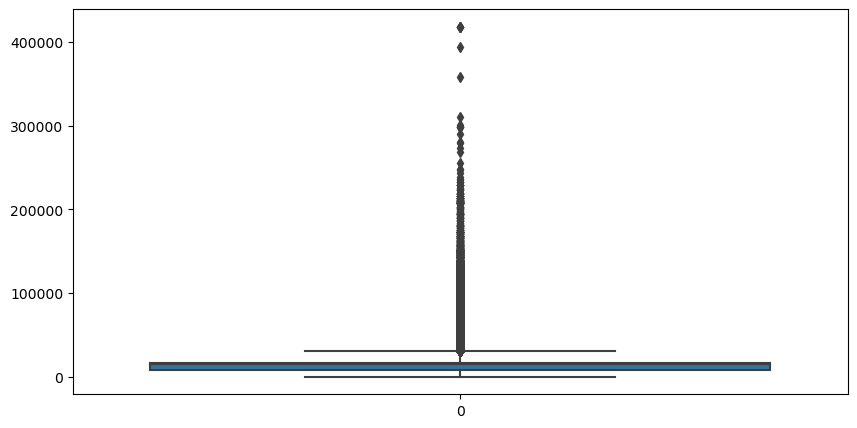

In [48]:
plt.figure(figsize=(10,5))
sns.boxplot(dfs["AMT_ANNUITY"])

In [49]:
def outliers(col_name):
  plt.figure(figsize=(10,6))
  sns.boxplot(dfs[col_name])


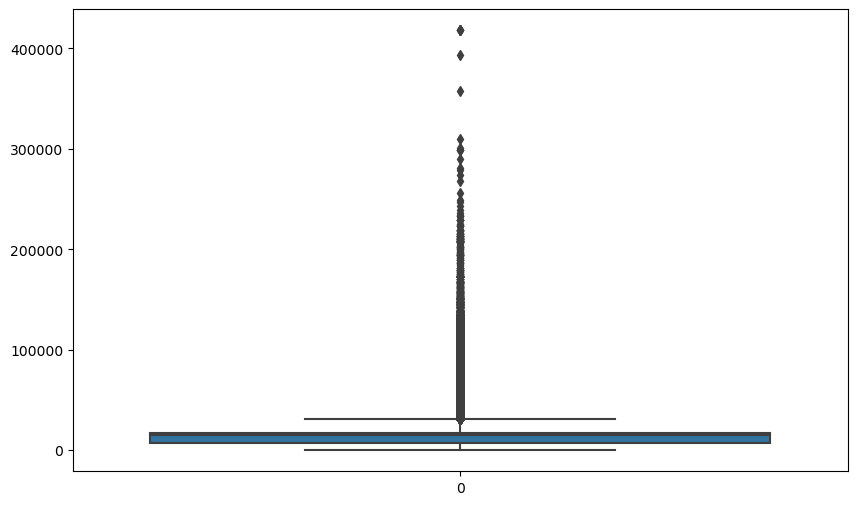

In [50]:
outliers('AMT_ANNUITY')

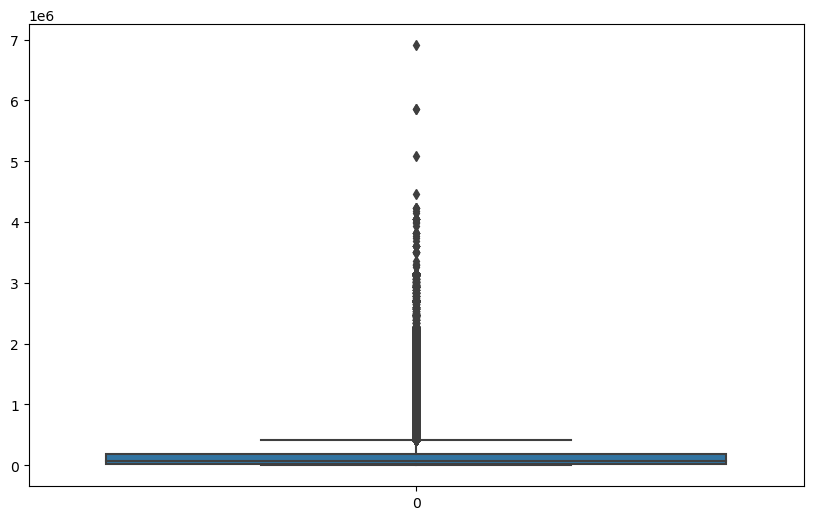

In [51]:
outliers('AMT_APPLICATION')

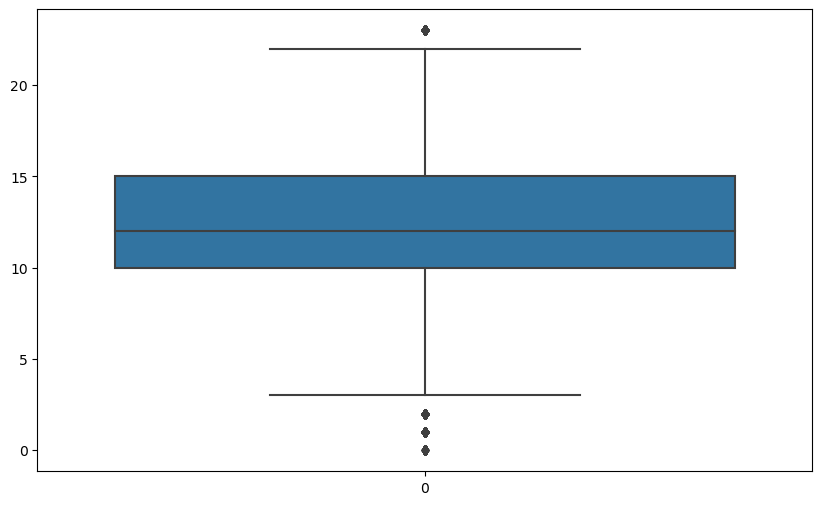

In [54]:
outliers('HOUR_APPR_PROCESS_START')

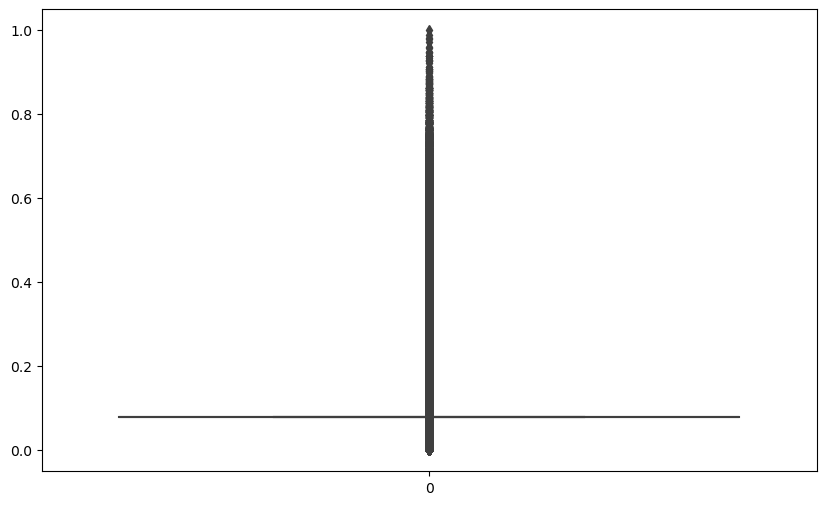

In [55]:
outliers('RATE_DOWN_PAYMENT')

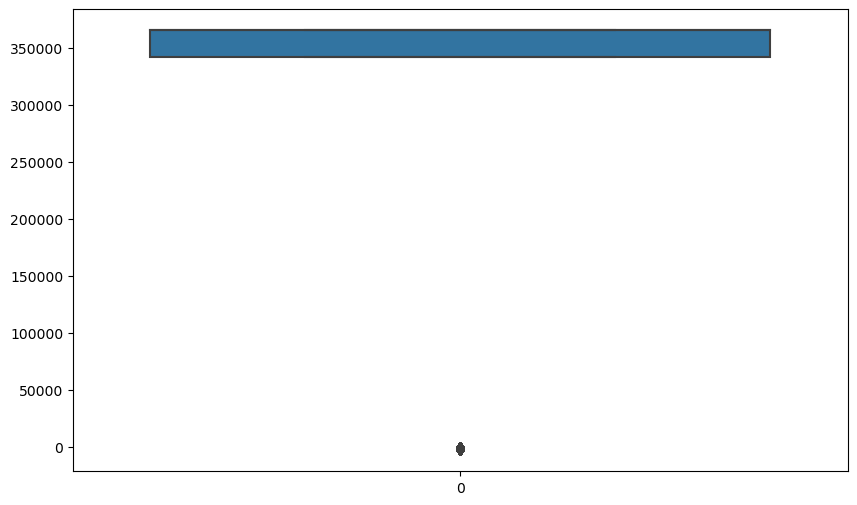

In [56]:
outliers("DAYS_FIRST_DRAWING")

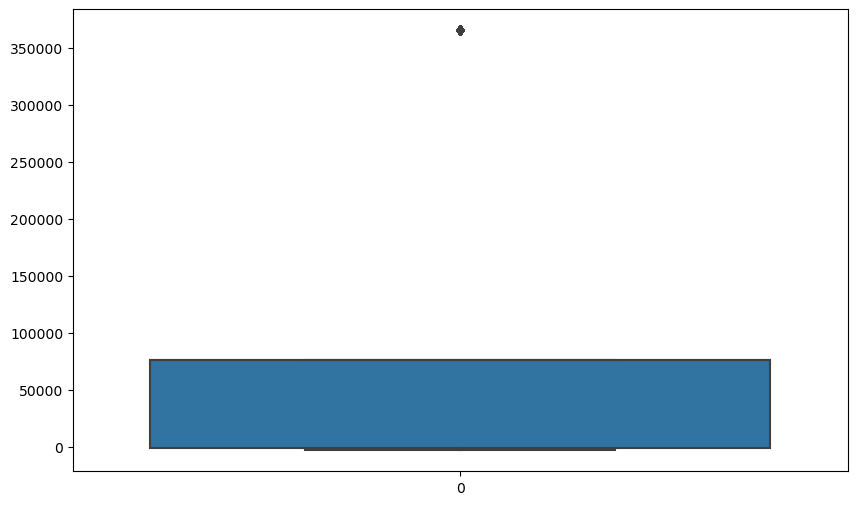

In [57]:
outliers("DAYS_LAST_DUE")

# Data Imbalance

The data imbalance is the distribution of dataset ,where majority and minority distribution of class can be found.
This type of analysis can be done on categorical type of columns .

The seaborn's countplot can be used to run this analysis.

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

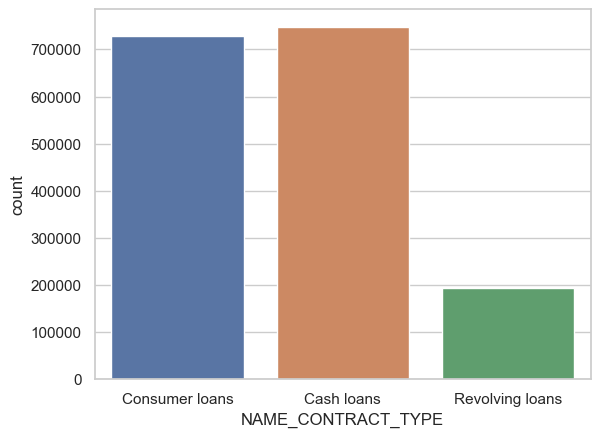

In [62]:
sns.set_theme(style='whitegrid')
sns.countplot(data=dfs,x='NAME_CONTRACT_TYPE')

<Axes: xlabel='NAME_CASH_LOAN_PURPOSE', ylabel='count'>

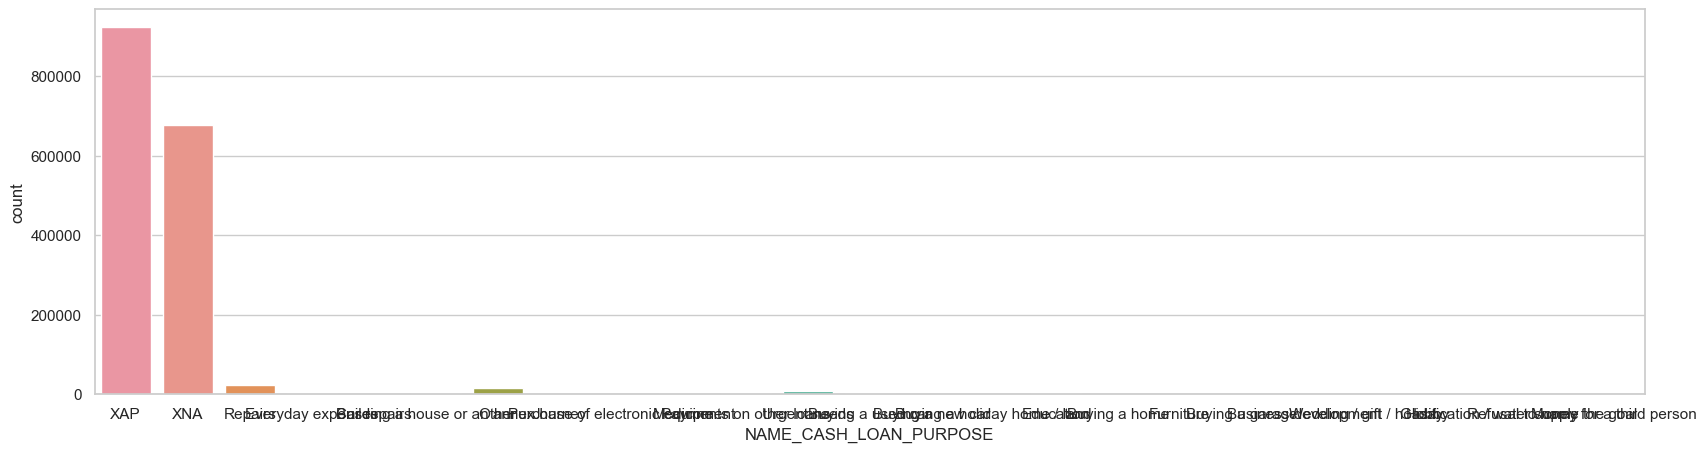

In [65]:
plt.figure(figsize=(20,5))
sns.countplot(data=dfs,x='NAME_CASH_LOAN_PURPOSE')

Most of the applicants have applied for the XAP cash loan purpose.

<Axes: xlabel='NAME_PAYMENT_TYPE', ylabel='count'>

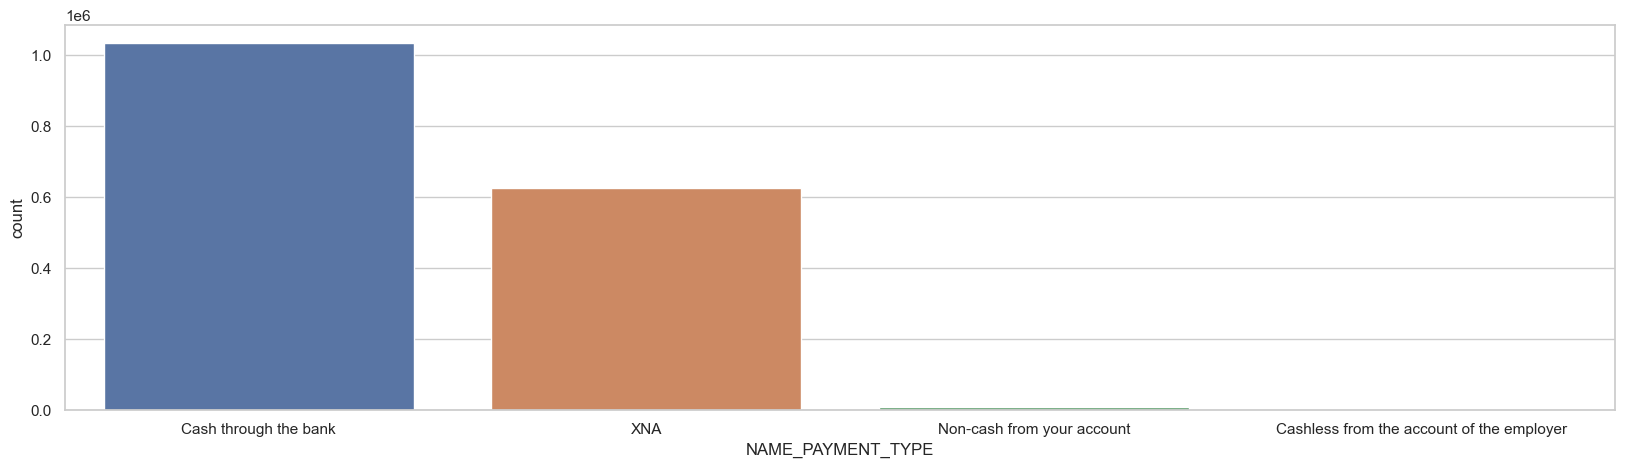

In [66]:
plt.figure(figsize=(20,5))
sns.countplot(data=dfs,x='NAME_PAYMENT_TYPE')

Most of the applicants payment type is "Cash through the bank".

<Axes: xlabel='NAME_TYPE_SUITE', ylabel='count'>

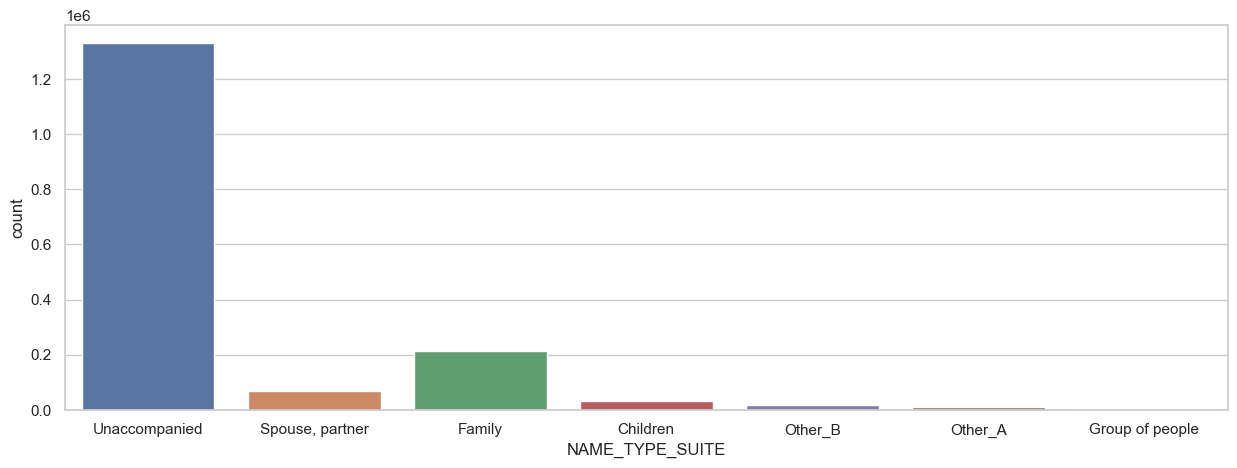

In [67]:
plt.figure(figsize=(25,5))
sns.countplot(data=dfs,x='NAME_TYPE_SUITE')

Most of the applicants are "Unaccompanied"type of suite.

This analysis can be automated by writing a function

In [71]:
def category(col):
    plt.figure(figsize=(25,5))
    sns.countplot(data=dfs,x=col)

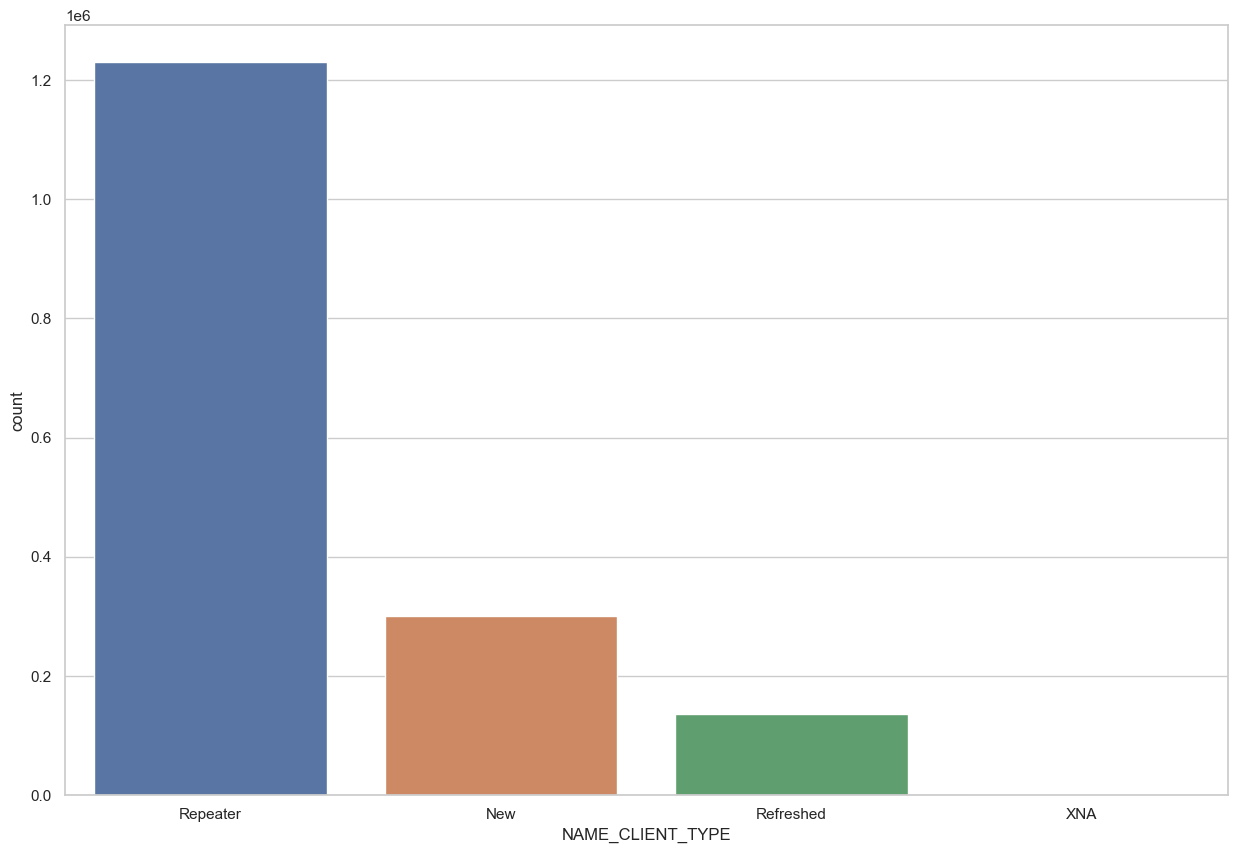

In [69]:
category('NAME_CLIENT_TYPE')

The most applicant type is "Repeater".

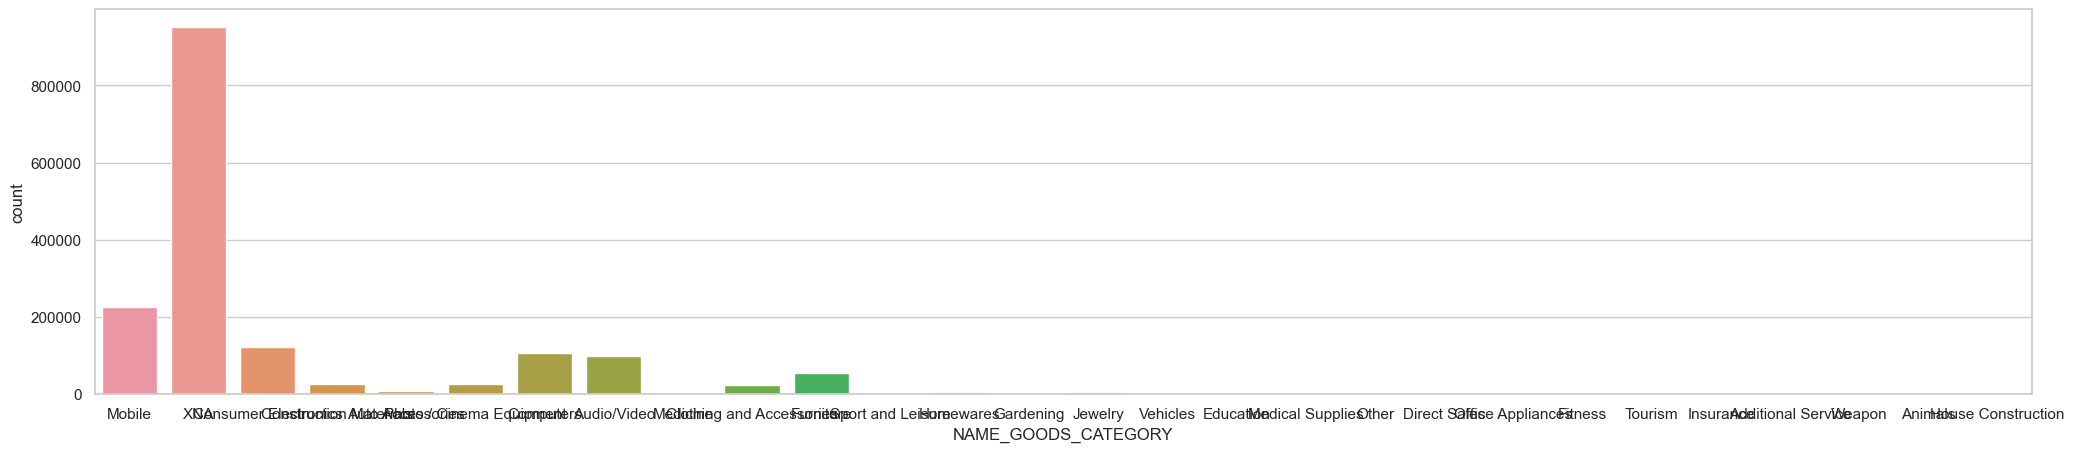

In [72]:
category('NAME_GOODS_CATEGORY')

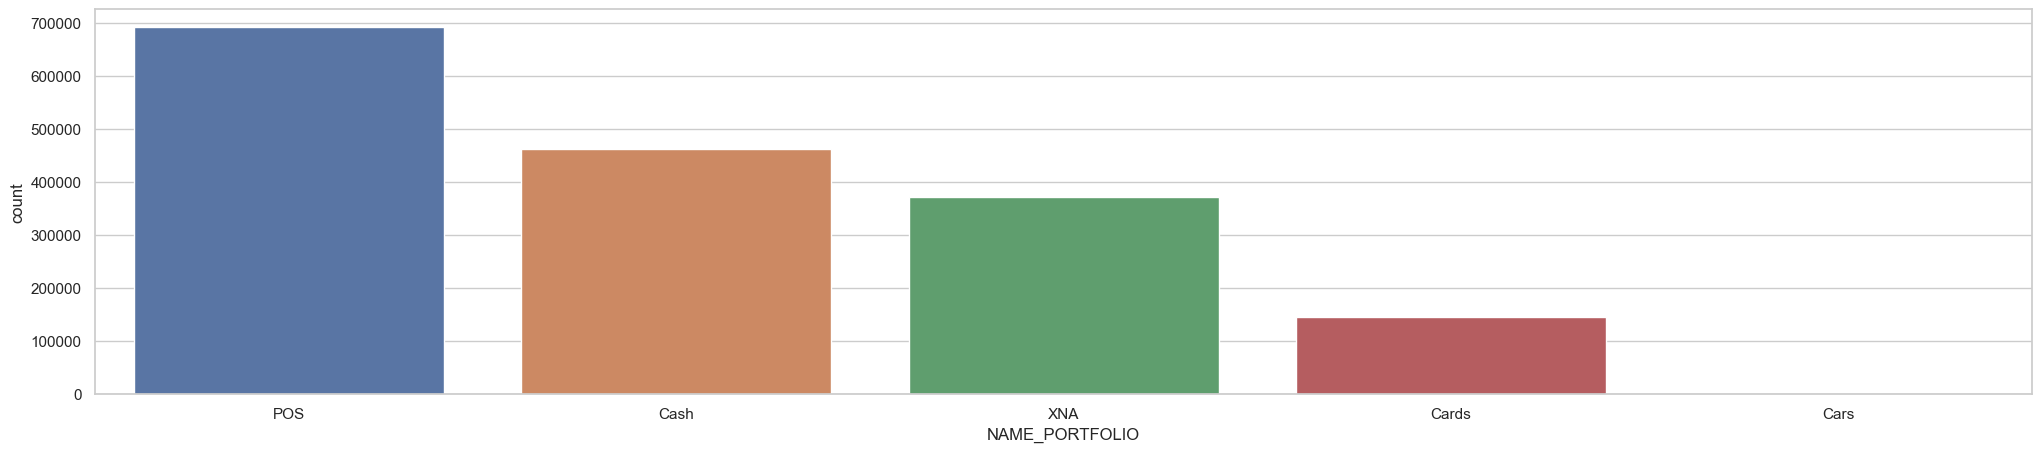

In [73]:
category('NAME_PORTFOLIO')

Most of the portfolio are "POS".

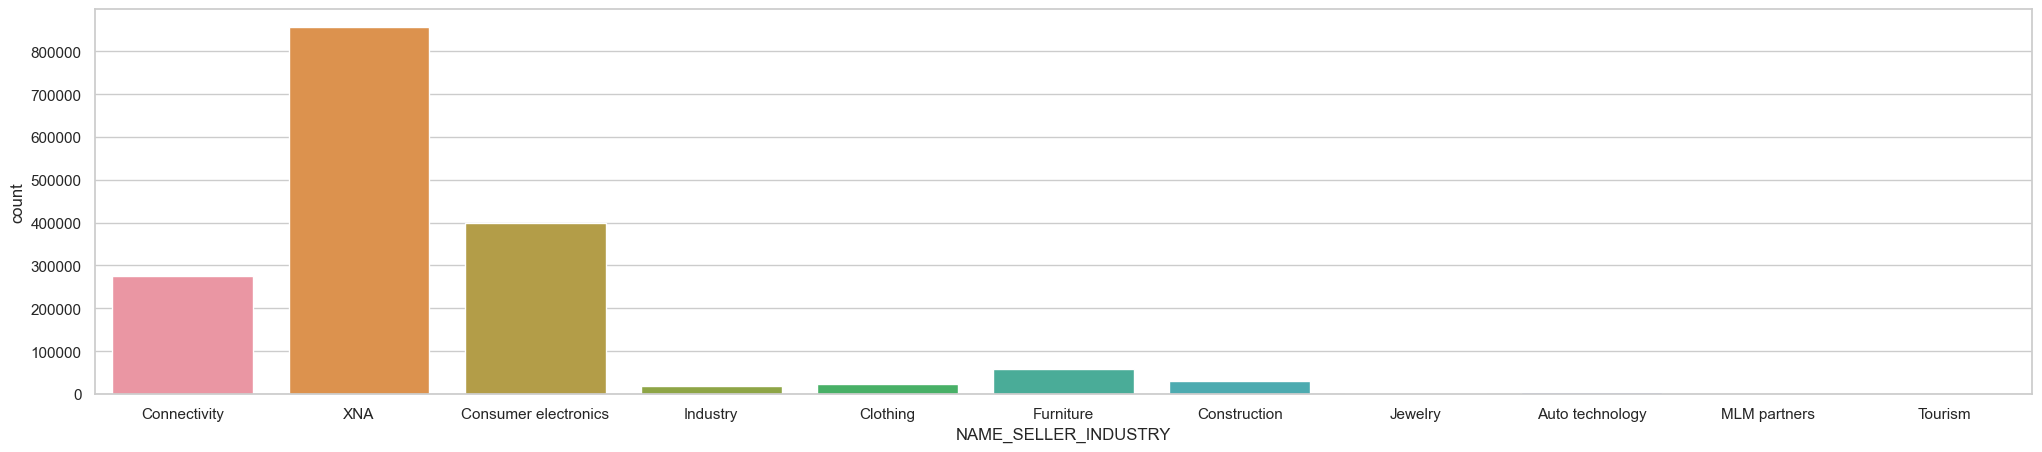

In [75]:
category('NAME_SELLER_INDUSTRY')

The most of applicants are from XNA industry

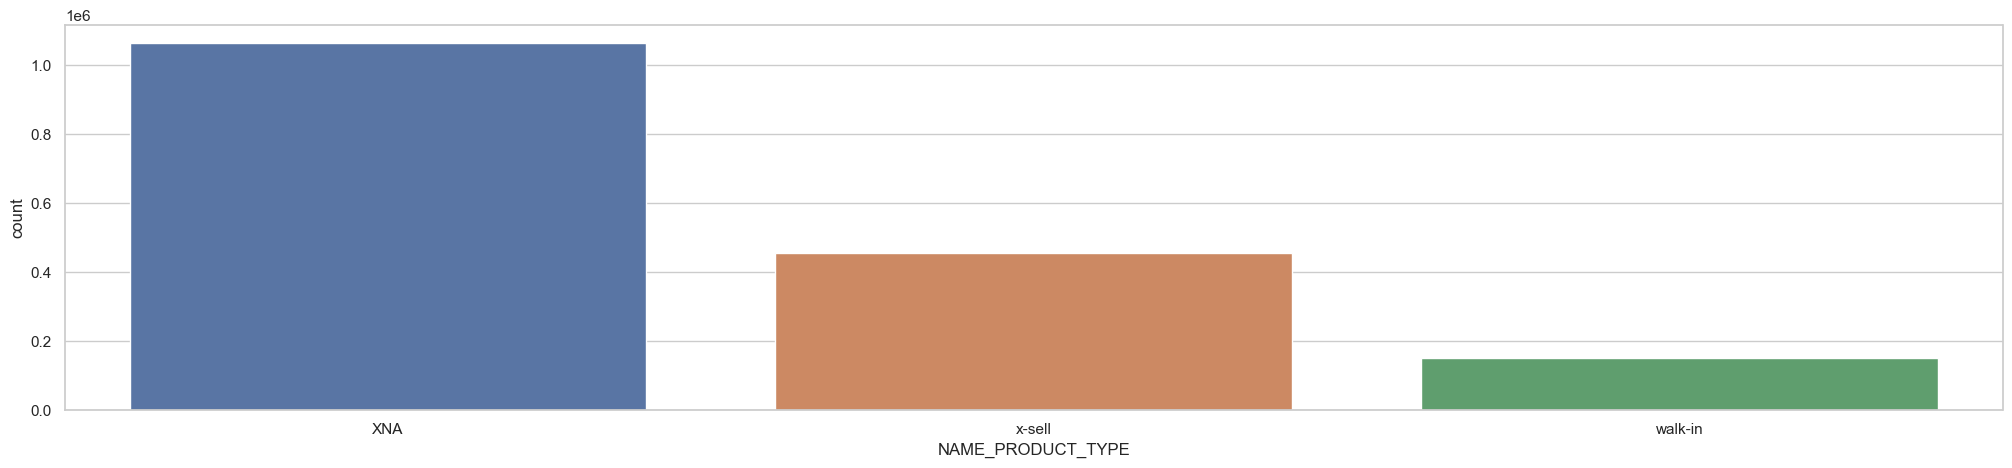

In [76]:
category('NAME_PRODUCT_TYPE')

# Univariate, segmented univariate, bivariate analysis

Univariate is used to analyse a single column.

In [77]:
def univariate(col):
    print("Mean:",dfs[col].mean())
    print("Median:",dfs[col].median())
    print(dfs[col].value_counts())
    sns.kdeplot(dfs[col])
    

Mean: 6697.4021387967
Median: 6697.402138796699
6697.402139     895497
0.000000        369854
4500.000000      21241
9000.000000      14747
13500.000000      9655
                 ...  
8303.760000          1
4567.095000          1
2080.350000          1
14174.820000         1
50476.500000         1
Name: AMT_DOWN_PAYMENT, Length: 29279, dtype: int64


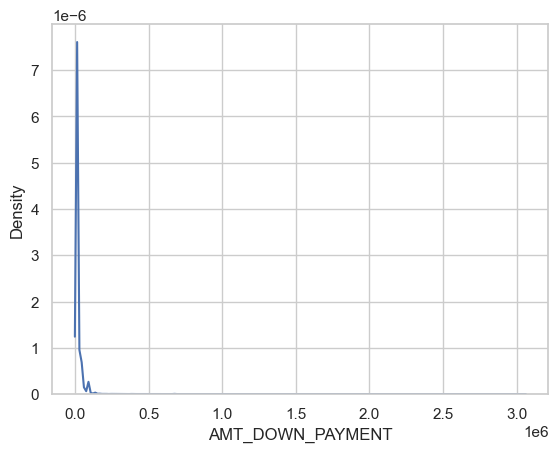

In [78]:
univariate('AMT_DOWN_PAYMENT')

Mean: 227847.2792833458
Median: 172669.05
227847.279283    385168
45000.000000      47831
225000.000000     43549
135000.000000     40666
450000.000000     38926
                  ...  
185292.000000         1
225054.000000         1
156212.550000         1
99896.310000          1
267295.500000         1
Name: AMT_GOODS_PRICE, Length: 93886, dtype: int64


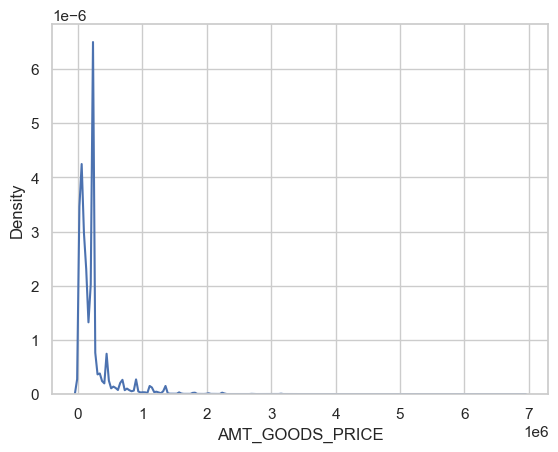

In [79]:
univariate('AMT_GOODS_PRICE')

Mean: 196154.65646099075
Median: 80550.0
0.00         336422
45000.00      35051
225000.00     21094
450000.00     19954
135000.00     18720
              ...  
262768.50         1
354213.00         1
438817.50         1
253111.50         1
436370.22         1
Name: AMT_CREDIT, Length: 86803, dtype: int64


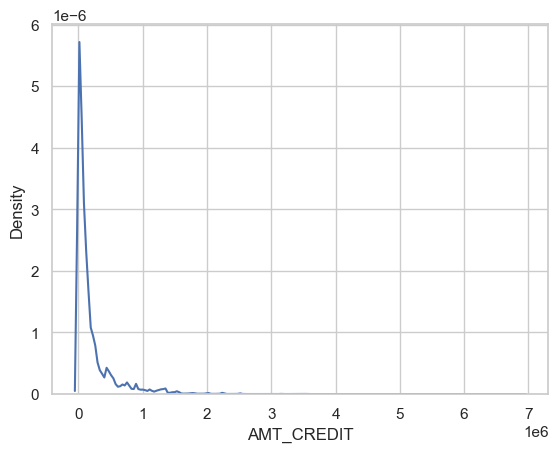

In [80]:
univariate('AMT_CREDIT')

Segmented Analysis

<Axes: xlabel='NAME_CASH_LOAN_PURPOSE', ylabel='count'>

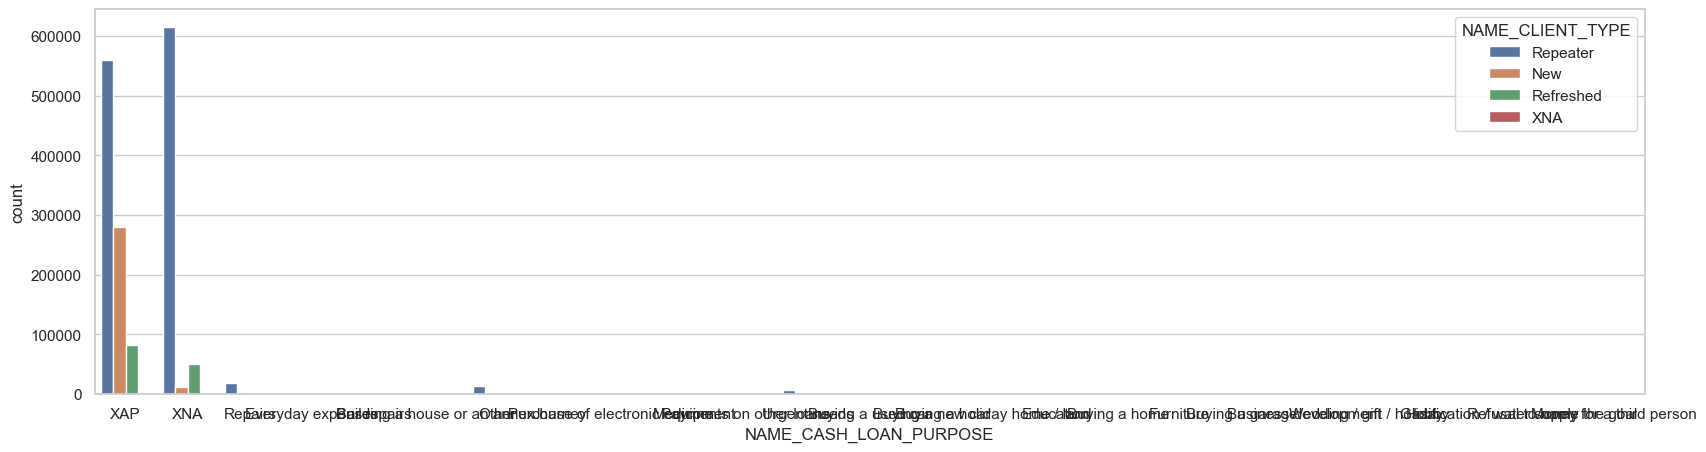

In [81]:
plt.figure(figsize=(20,5))
sns.countplot(data=dfs,x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CLIENT_TYPE')